In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
            os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
with_mask_face = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
without_mask_face = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')

### creating labels for the two class of images

with_mask_face --> 1


without_mask_face --> 0

In [4]:
print(len(with_mask_face))
print(len(without_mask_face))

3725
3828


In [5]:
with_mask_labels = [1]* 3725
without_mask_labels = [0]*3828

In [6]:
labels = with_mask_labels + without_mask_labels

In [7]:
len(labels)

7553

# display the images

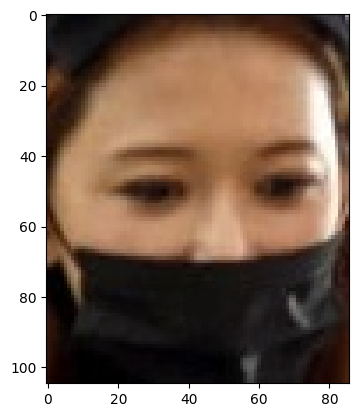

In [8]:
# display with mask image

img = mpimg.imread("/kaggle/input/face-mask-dataset/data/with_mask/with_mask_100.jpg")
imgplot = plt.imshow(img)
plt.show()

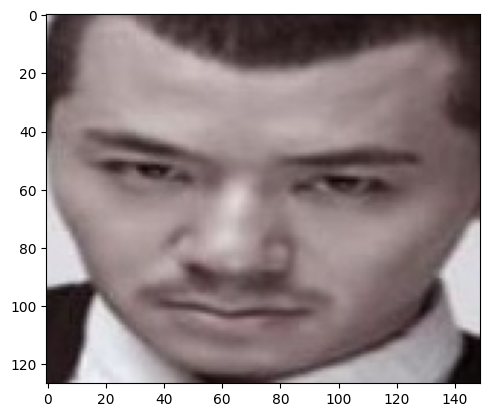

In [9]:
# display without mask image

img = mpimg.imread("/kaggle/input/face-mask-dataset/data/without_mask/without_mask_100.jpg")
imgplot = plt.imshow(img)
plt.show()

## resize and convert
 ### 1. resize the images

 ### 2. convert the images to numpy arrays

In [10]:

with_mask_path = "/kaggle/input/face-mask-dataset/data/with_mask/"

data = []

for img_file in with_mask_face:
    image = Image.open(with_mask_path+img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


without_mask_path = "/kaggle/input/face-mask-dataset/data/without_mask/"

for img_file in without_mask_face:
    image = Image.open(without_mask_path+img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
len(data)

7553

In [12]:
data[0].shape

(128, 128, 3)

In [13]:
# converting image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

In [14]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


## Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255


# Building a Convolutional Neural Network

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model
from keras.utils import plot_model

In [18]:
vgg = VGG16(include_top=False, input_shape=(128, 128, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
vgg.trainable = False
output = vgg.layers[-1].output

flatten = Flatten()(output)

dense1 = Dense(512, activation="relu")(flatten)
dense2 = Dense(128, activation="relu")(dense1)
dense3 = Dense(64, activation="relu")(dense2)

output1 = Dense(2, activation="sigmoid")(dense3)

In [20]:
model = Model(inputs=vgg.input, outputs=[output1])

In [21]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 18,983,554 (72.42 MB)

 Trainable params: 4,268,866 (16.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

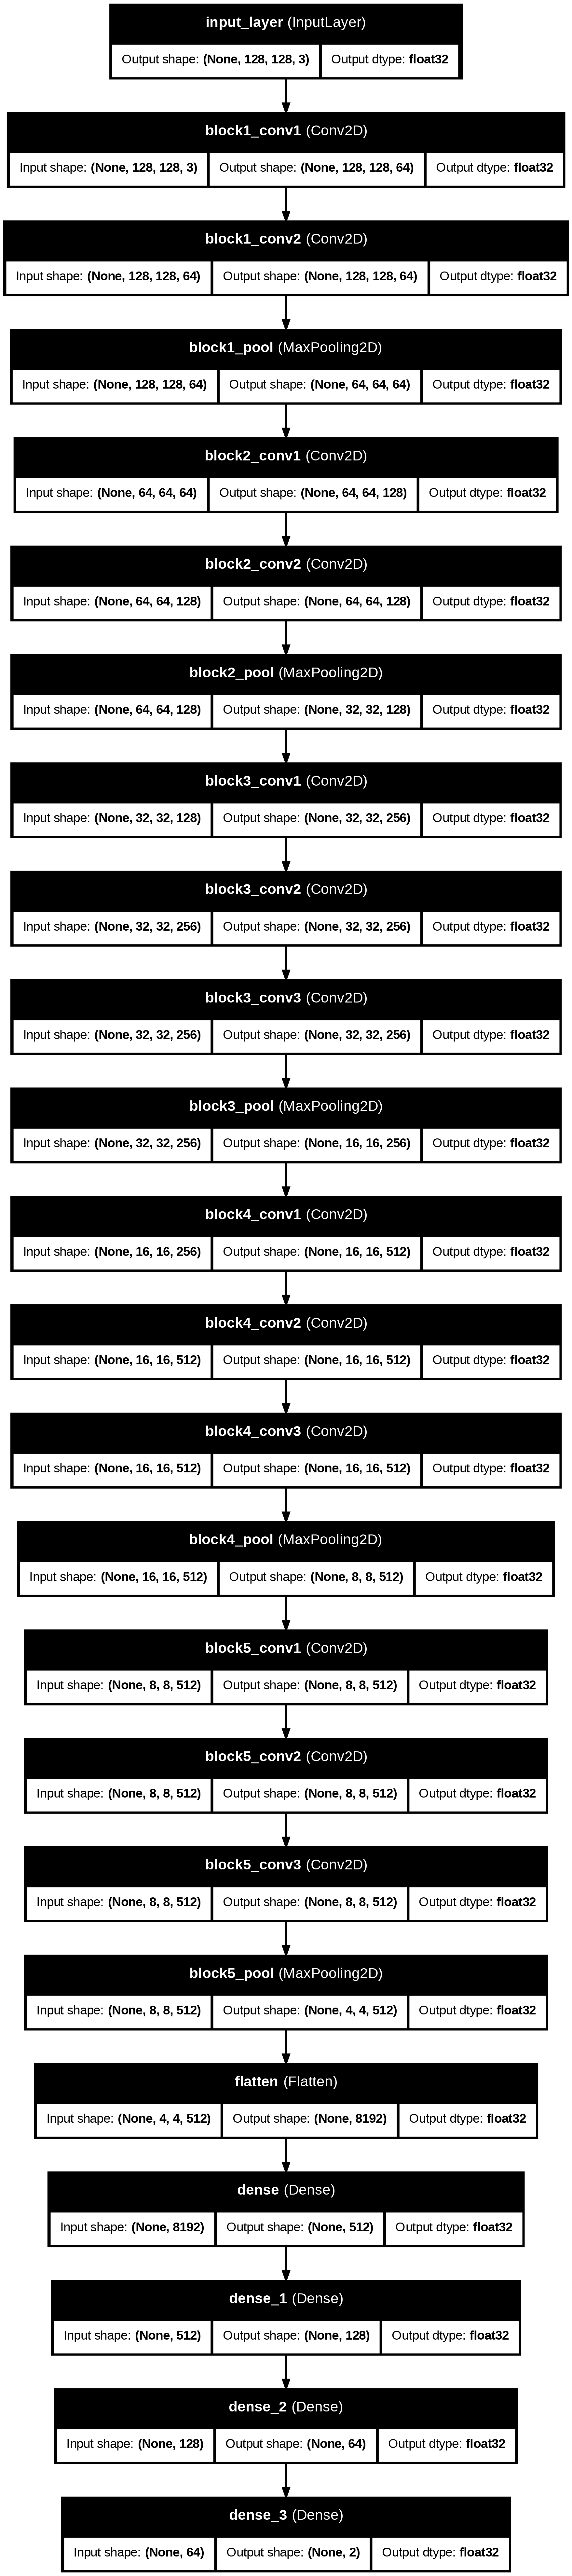

In [22]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [23]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [24]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.8666 - loss: 0.3009 - val_accuracy: 0.9091 - val_loss: 0.2084
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9727 - loss: 0.0729 - val_accuracy: 0.9570 - val_loss: 0.1200
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9812 - loss: 0.0522 - val_accuracy: 0.9669 - val_loss: 0.0930
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9909 - loss: 0.0239 - val_accuracy: 0.9686 - val_loss: 0.1214
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9912 - loss: 0.0279 - val_accuracy: 0.9521 - val_loss: 0.1567
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9946 - loss: 0.0160 - val_accuracy: 0.9603 - val_loss: 0.1668
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9932 - loss: 0.0156 - val_accuracy: 0.9669 - val_loss: 0.1689
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9975 - loss: 0.0087 - val_acc

# Model Evaluation

In [25]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9793 - loss: 0.0636


In [26]:
print("test accuracy", accuracy)

test accuracy 0.9768365025520325


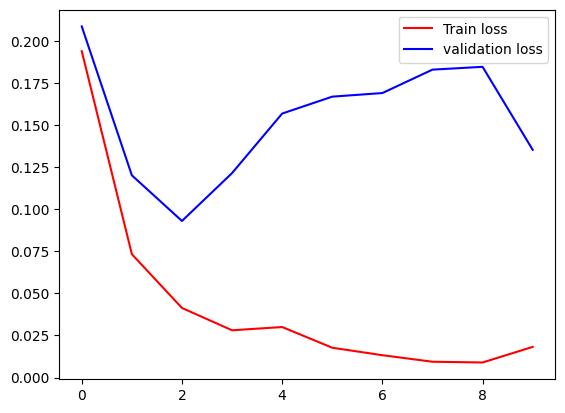

In [27]:
# plot the loss value

plt.plot(history.history["loss"], label="Train loss", color="red")
plt.plot(history.history["val_loss"], label="validation loss", color="blue")
plt.legend()
plt.show()

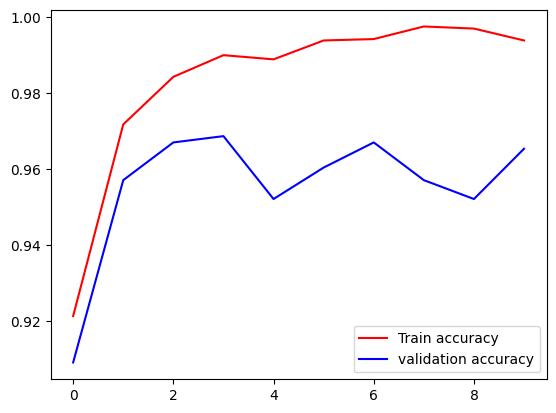

In [28]:
# plot the accuracy value

plt.plot(history.history["accuracy"], label="Train accuracy", color="red")
plt.plot(history.history["val_accuracy"], label="validation accuracy", color="blue")
plt.legend()
plt.show()

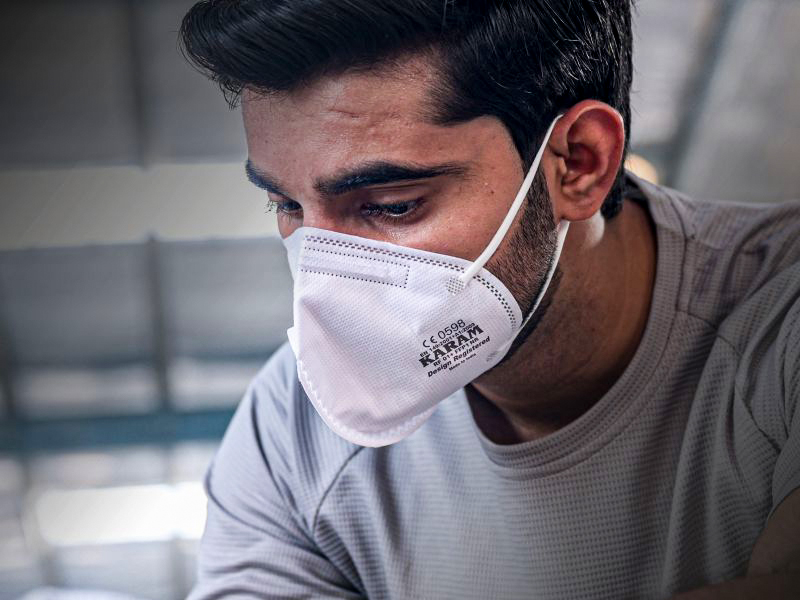

In [29]:
im = cv.imread("/kaggle/input/ngksnkgs/Website Blog-Mask-2_0.jpg")
cv2_imshow(im)

In [30]:
# preidct an image

input_image_path = input("path of the image")

input_image = cv.imread(input_image_path)

input_image_resized = cv.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])


input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

if input_prediction_label == 1:
    print("The person is wearing a mask")
else:
    print("The person is not wearing a mask")

path of the image /kaggle/input/ngksnkgs/Website Blog-Mask-2_0.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step
[[0.04699135 0.9971232 ]]
1
The person is wearing a mask


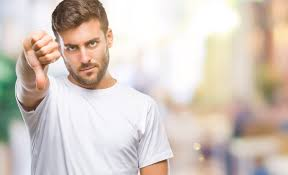

In [31]:
im = cv.imread("/kaggle/input/ngksnkgs/images.jpeg")
cv2_imshow(im)

In [32]:
# preidct an image

input_image_path = input("path of the image")

input_image = cv.imread(input_image_path)

input_image_resized = cv.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])


input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

if input_prediction_label == 1:
    print("The person is wearing a mask")
else:
    print("The person is not wearing a mask")

path of the image /kaggle/input/ngksnkgs/images.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.6448404 0.5937203]]
0
The person is not wearing a mask


In [35]:
model.save('model.h5')